<a href="https://colab.research.google.com/github/JaimieOnigkeit/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jaimie_Onigkeit_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'y':1, 'n':0, '?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
#Confidence Interval function
def confidence_interval(sample, confidence=0.95):
  '''
  Calculates a confidence interval around a sample mean for given data, using t-dist and 2-tailed test, default 95% confidence.
  Arguments:
    data-iterable (list or numpy array) of sample observations
    confidence-level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
    '''
  sample = np.array(sample)
  mean = np.mean(sample)
  n=len(sample)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error


In [9]:
#Test
lower_bound, mean, upper_bound = confidence_interval(df['handicapped-infants'])
print('lower bound ', lower_bound)
print('mean ', mean)
print('upper bound ', upper_bound)

lower bound  nan
mean  nan
upper bound  nan


## Split Data and Replace NaNs

In [10]:
#It hates the NaNs. I'm going to seperate the reps from dems so I can find the most likely NaN replacement per column.
#Separate republican data out
rep = df[df['party']=='republican']

rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [15]:
rep = rep.drop('party', axis='columns')

rep.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [19]:
rep = rep.apply(lambda x: x.fillna(x.mean()), axis=0)

rep

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0.0,1.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,1.000000,0.132075,1.000000,1.0,1.0,0.000000,1.000000
1,0.0,1.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,0.657534
7,0.0,1.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.089744,1.000000
8,0.0,1.000000,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000
10,0.0,1.000000,0.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.132075,0.870968,1.0,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,0.000000,0.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000
430,0.0,0.000000,1.0,1.0,1.0,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,0.000000,1.000000
432,0.0,0.506757,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,0.000000,1.000000
433,0.0,0.000000,0.0,1.0,1.0,1.0,0.240741,0.152866,0.115152,0.557576,0.000000,1.000000,1.0,1.0,0.000000,1.000000


In [11]:
#Seperate democrat data out
dem = df[df['party']=='democrat']

dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [20]:
dem = dem.drop('party', axis='columns')

dem.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [22]:
dem = dem.apply(lambda x: x.fillna(x.mean()), axis=0)

dem

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,0.604651,1.000000,1.000000,0.054054,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.000000,0.0,0.000000
3,0.000000,1.000000,1.000000,0.000000,0.215686,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.0,1.000000
4,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.144578,1.000000,1.000000,1.0,1.000000
5,0.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.0,1.000000
6,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.289683,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.935135
426,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,1.0,1.000000
428,0.604651,0.502092,0.888462,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,1.000000,0.000000,1.0,1.000000
429,1.000000,0.000000,1.000000,0.000000,0.215686,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.000000,0.350195,1.0,1.000000


## Confidence Interval for Republicans on Budget Issue

In [26]:
#Confidence Interval for republicans on the budget issue
lower_bound, mean, upper_bound = confidence_interval(rep['budget'])
print('lower bound ', lower_bound)
print('mean ', mean)
print('upper bound ', upper_bound)

lower bound  0.08270320150952612
mean  0.13414634146341464
upper bound  0.18558948141730316


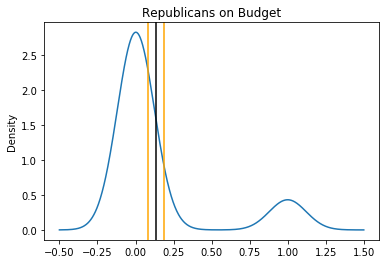

In [32]:
CI_rep = confidence_interval(rep['budget'])
rep_budget = rep['budget']

rep_budget.plot.density()
plt.title('Republicans on Budget')
plt.axvline(x=CI_rep[0], color = 'orange')
plt.axvline(x=CI_rep[1], color = 'black')
plt.axvline(x=CI_rep[2], color = 'orange')
plt.show()

The graphic indicates that the data is somewhat binomial (as expected, given that I changed yes to 1 and no to 0), however, this was clearly an issue the republicans were not generally in favor of.

## Confidence Interval for Democrats on Budget Issue

In [33]:
#Confidence Interval for democrats on the budget issue
lower_bound, mean, upper_bound = confidence_interval(dem['budget'])
print('lower bound ', lower_bound)
print('mean ', mean)
print('upper bound ', upper_bound)

lower bound  0.8509598821757811
mean  0.8884615384615384
upper bound  0.9259631947472957


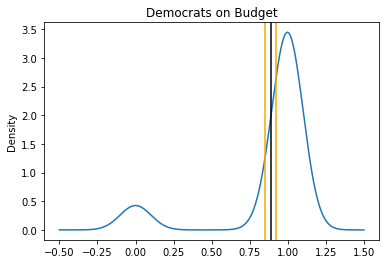

In [34]:
CI_rep = confidence_interval(dem['budget'])
dem_budget = dem['budget']

dem_budget.plot.density()
plt.title('Democrats on Budget')
plt.axvline(x=CI_rep[0], color = 'orange')
plt.axvline(x=CI_rep[1], color = 'black')
plt.axvline(x=CI_rep[2], color = 'orange')
plt.show()

It's interesting that this graphic is almost a mirror opposite of the previous one. This graph is also somewhat binomial, although it was greatly favored by democrats.

# Chi-Squared Tests


\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

In [37]:
from google.colab import files
uploaded = files.upload()

Saving flag.data to flag.data


In [38]:
df = pd.read_csv('flag.data', 
                 names=['name', 'landmass', 'zone', 'area', 'population',
                        'language', 'religion', 'bars', 'stripes','colors', 
                        'red', 'green', 'blue', 'gold', 'white', 'black', 
                        'orange', 'mainhue', 'circles', 'crosses', 'saltaires',
                        'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
                        'animate', 'text', 'topleft', 'botright'])

df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltaires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


## Using NumPy

In [39]:
df['language'].value_counts()

10    46
1     43
6     30
2     21
8     19
3     17
4      6
9      4
7      4
5      4
Name: language, dtype: int64

In [40]:
df['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [43]:
contingency_table = pd.crosstab(df['language'], df['religion'], margins=True)

print(contingency_table.shape)
contingency_table

(11, 9)


religion,0,1,2,3,4,5,6,7,All
language,,,,,,,,,
1,1,36,0,0,2,4,0,0,43
2,20,0,0,0,0,0,1,0,21
3,5,1,6,0,0,4,0,1,17
4,3,2,0,0,0,0,1,0,6
5,0,0,0,0,0,0,4,0,4
6,9,13,3,0,1,1,3,0,30
7,0,0,0,3,0,0,1,0,4
8,0,0,19,0,0,0,0,0,19
9,0,1,1,0,0,0,1,1,4


In [45]:
row_sums = contingency_table.iloc[0:10, 8].values
col_sums = contingency_table.iloc[10, 0:8].values

print(row_sums)
print(col_sums)

[43 21 17  6  4 30  4 19  4 46]
[40 60 36  8  4 27 15  4]


In [0]:
total_total = df.shape[0]

In [47]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(10, 8)
[[ 8.86597938 13.29896907  7.97938144  1.77319588  0.88659794  5.98453608
   3.32474227  0.88659794]
 [ 4.32989691  6.49484536  3.89690722  0.86597938  0.43298969  2.92268041
   1.62371134  0.43298969]
 [ 3.50515464  5.25773196  3.15463918  0.70103093  0.35051546  2.36597938
   1.31443299  0.35051546]
 [ 1.2371134   1.8556701   1.11340206  0.24742268  0.12371134  0.83505155
   0.46391753  0.12371134]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [ 6.18556701  9.27835052  5.56701031  1.2371134   0.6185567   4.17525773
   2.31958763  0.6185567 ]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [ 3.91752577  5.87628866  3.5257732   0.78350515  0.39175258  2.6443299
   1.46907216  0.39175258]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [ 9.48453608 14.22680412  8.53608247  1.89690722  0.94845361  6.40206186
   3.55670

In [48]:
observed = pd.crosstab(df['language'], df['religion']).values
print(observed.shape)
print(observed)

(10, 8)
[[ 1 36  0  0  2  4  0  0]
 [20  0  0  0  0  0  1  0]
 [ 5  1  6  0  0  4  0  1]
 [ 3  2  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  4  0]
 [ 9 13  3  0  1  1  3  0]
 [ 0  0  0  3  0  0  1  0]
 [ 0  0 19  0  0  0  0  0]
 [ 0  1  1  0  0  0  1  1]
 [ 2  7  7  5  1 18  4  2]]


In [49]:
chi_squared = ((observed - expected) ** 2 / (expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 394.94069923820183


We can definitely fail to reject the null hypothesis that language and religion are independent variables.

## Using SciPy

In [50]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print('Expected: \n', np.array(expected))

Chi-Squared: 394.94069923820183
P-value: 1.4365774907835361e-49
Degrees of Freedom: 63
Expected: 
 [[ 8.86597938 13.29896907  7.97938144  1.77319588  0.88659794  5.98453608
   3.32474227  0.88659794]
 [ 4.32989691  6.49484536  3.89690722  0.86597938  0.43298969  2.92268041
   1.62371134  0.43298969]
 [ 3.50515464  5.25773196  3.15463918  0.70103093  0.35051546  2.36597938
   1.31443299  0.35051546]
 [ 1.2371134   1.8556701   1.11340206  0.24742268  0.12371134  0.83505155
   0.46391753  0.12371134]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [ 6.18556701  9.27835052  5.56701031  1.2371134   0.6185567   4.17525773
   2.31958763  0.6185567 ]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [ 3.91752577  5.87628866  3.5257732   0.78350515  0.39175258  2.6443299
   1.46907216  0.39175258]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.082

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)